## Task 1: Exploratory Data Analysis (EDA) and Business Insights


### 1.Load the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#read CSV files
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv") 

In [5]:
customers.shape

(200, 4)

In [6]:
products.shape

(100, 4)

In [7]:
transactions.shape

(1000, 7)

In [8]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [10]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


#### MERGE DATASETS

In [12]:
# Merge Customers and Transactions
data = transactions.merge(customers, on="CustomerID", how="left")

# Merge with Products
data = data.merge(products, on="ProductID", how="left")

In [13]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


#### 2.Data Summary and Descriptive Statistics: 

In [15]:
data.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [16]:
data.shape

(1000, 13)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price_x          1000 non-null   float64
 7   CustomerName     1000 non-null   object 
 8   Region           1000 non-null   object 
 9   SignupDate       1000 non-null   object 
 10  ProductName      1000 non-null   object 
 11  Category         1000 non-null   object 
 12  Price_y          1000 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 101.7+ KB


In [18]:
data.describe()

,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [19]:
#to check data Types
data.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price_x            float64
CustomerName        object
Region              object
SignupDate          object
ProductName         object
Category            object
Price_y            float64
dtype: object

### 3.Data Cleaning


In [21]:
# checkthe missing values
data.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

In [22]:
#check unique values
data.nunique()


TransactionID      1000
CustomerID          199
ProductID           100
TransactionDate    1000
Quantity              4
TotalValue          369
Price_x             100
CustomerName        199
Region                4
SignupDate          178
ProductName          66
Category              4
Price_y             100
dtype: int64

##### Duplicate row Removal

In [24]:
# Check where Price_x and Price_y are equal and drop one of them 
data= data.loc[:, ~data.columns.isin(['Price_y'])] if (data['Price_x'] == data['Price_y']).all() else data

In [25]:
data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics


In [26]:
#drop unique identifier
data = data.drop(['TransactionID','ProductID'], axis=1)


In [27]:
#convert data types into datetime
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data.dtypes

CustomerID                 object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price_x                   float64
CustomerName               object
Region                     object
SignupDate         datetime64[ns]
ProductName                object
Category                   object
dtype: object

#### 4.Exploratory Visualizations:

### 1. Group sales by region


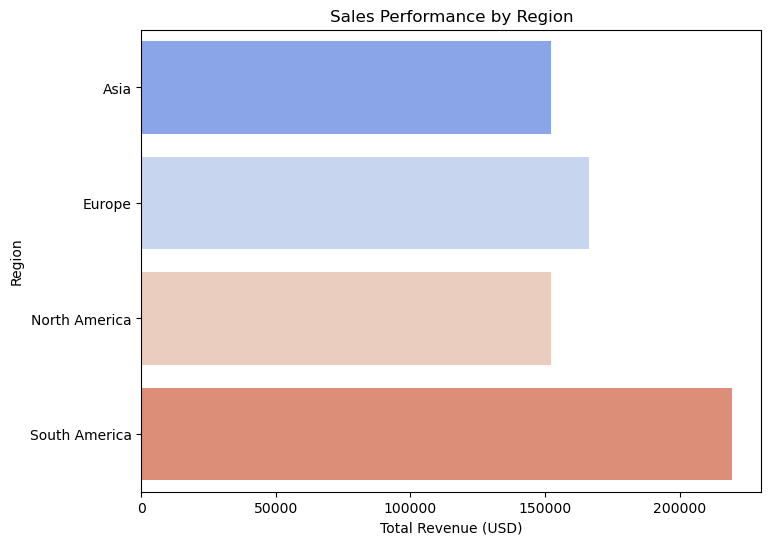

In [30]:
region_sales = data.groupby('Region')['TotalValue'].sum().reset_index()

# Plot regional sales
plt.figure(figsize=(8, 6))
sns.barplot(data=region_sales, x='TotalValue', y='Region', hue='Region', palette='coolwarm', legend=False)
plt.title('Sales Performance by Region')
plt.xlabel('Total Revenue (USD)')
plt.ylabel('Region')
plt.show()


##### Business Insights:
 - South America has the highest sales, indicating strong demand in this region. The company should consider investing more in South America to take advantage of this growth.
 - Europe comes in second, which is good but shows room for improvement. The company could focus on boosting sales in Europe with targeted strategies.
 - Asia and North America  are performing lower. The company could explore new opportunities or marketing strategies in these regions to increase sales.

### 2.Calculate quantity sold for each product


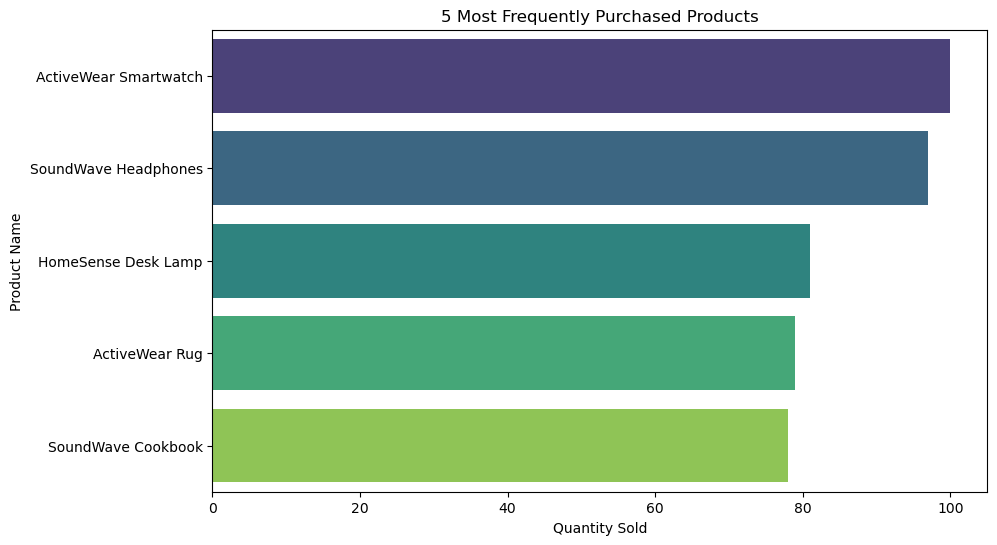

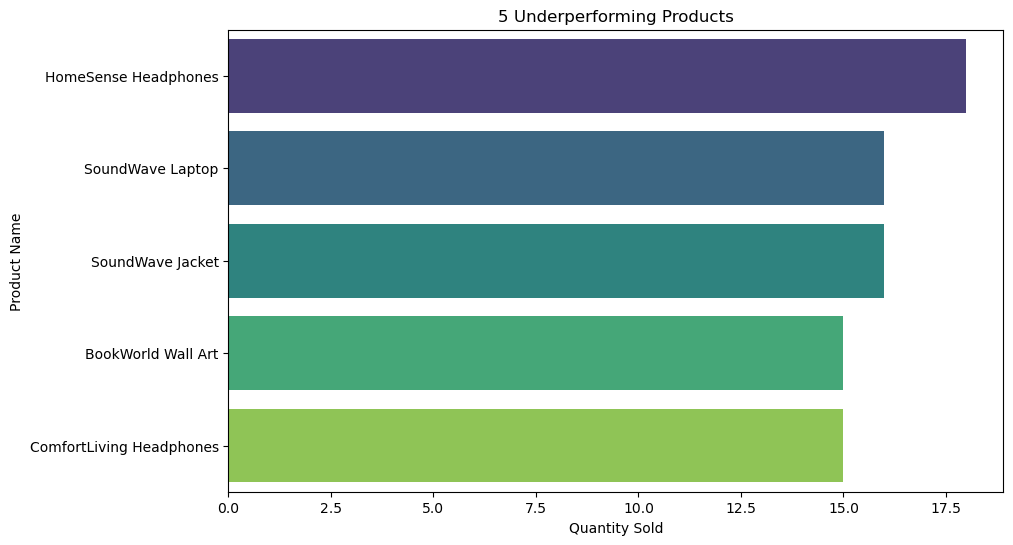

In [33]:
product_quantity = data.groupby('ProductName')['Quantity'].sum().reset_index()



### top 5 product
# Sort by quantity sold
top_products = product_quantity.sort_values(by='Quantity', ascending=False).head(5)

# Plot top products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='viridis',legend=False, hue='ProductName')
plt.title('5 Most Frequently Purchased Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

### least 5 product
# Sort by quantity sold
top_products = product_quantity.sort_values(by='Quantity', ascending=False).tail(5)

# Plot top products
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products, x='Quantity', y='ProductName', palette='viridis',legend=False, hue='ProductName')
plt.title('5 Underperforming Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

##### Business Insights:
 - Top 5 Products: These products are the most popular and in high demand. Focus on increasing stock and promotions for these items to meet customer preferences.
 - Least 5 Products: These products have low sales and may be underperforming. Investigate reasons for low demand, such as pricing, availability, or relevance, and consider promotional strategies or product improvements.
 - Strategy: Increase visibility and marketing for top products while reevaluating or discontinuing underperforming items. Optimize inventory management based on sales trends.








### 3.Top 5 High-Value Customers

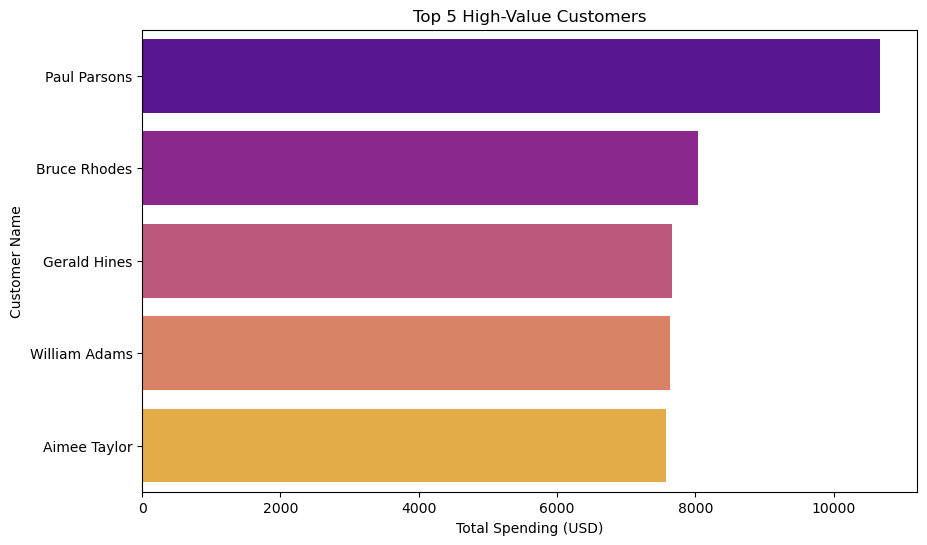

In [36]:
# Calculate total spending by customer
customer_spending = data.groupby(['CustomerID', 'CustomerName'])['TotalValue'].sum().reset_index()

# Sort by total spending
top_customers = customer_spending.sort_values(by='TotalValue', ascending=False).head(5)

# Plot top customers
plt.figure(figsize=(10, 6))
sns.barplot(data=top_customers, x='TotalValue', y='CustomerName', palette='plasma',legend=False, hue='CustomerName')
plt.title('Top 5 High-Value Customers')
plt.xlabel('Total Spending (USD)')
plt.ylabel('Customer Name')
plt.show()


##### Business Insights :
 - The top 5 customers, led by Paul Parsons, are the biggest contributors to overall spending.
 - Knowing which regions these customers come from can help identify areas driving the most revenue.
 - Understanding what products they prefer gives insight into popular categories and helps tailor offerings.
 - These customers are valuable and should be prioritized for loyalty programs and personalized experiences.
 - Expanding efforts to attract more customers with similar buying patterns can boost overall sales.

### 4.Product Category Distribution

Category
Books          270
Electronics    254
Home Decor     248
Clothing       228
Name: count, dtype: int64


<Axes: title={'center': 'Product Category Distribution'}, ylabel='count'>

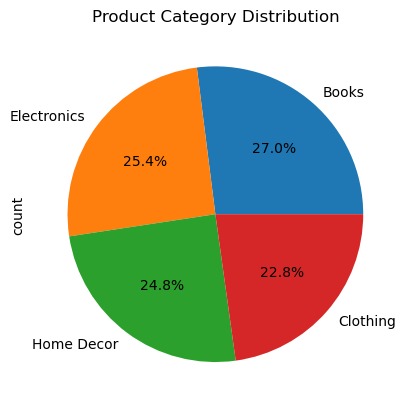

In [39]:
category_distribution = data['Category'].value_counts()
print(category_distribution)
category_distribution.plot(kind='pie', autopct='%1.1f%%', title='Product Category Distribution')


##### Business Insights:
 - This pie chart shows us what people are buying most on this e-commerce site. 
 - "Books" are the biggest hit, making up nearly 27% of sales. 
 - "Electronics" and "Home Decor" are also popular, with around 25% and 24% of sales respectively. 
 - "Clothing" is still important, but makes up a slightly smaller portion at 22.8%.

### 5.Seasonal Trends in Transactions (Month-Wise)

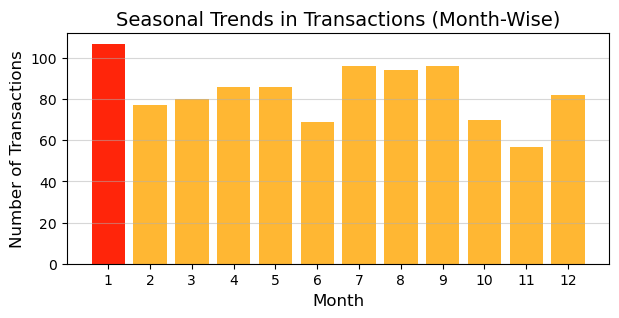

The month with the most transactions is month 1 with 107 transactions.


In [42]:
# Extract the month from 'TransactionDate' without adding it to the DataFrame
month_transactions = data['TransactionDate'].dt.month.value_counts().sort_index().reset_index(name='TransactionCount')
month_transactions.columns = ['TransactionMonth', 'TransactionCount']

# Find the month with the highest number of transactions
max_month = month_transactions.loc[month_transactions['TransactionCount'].idxmax()]

# Plot the seasonality (month-wise trends across all years)
plt.figure(figsize=(7, 3))
plt.bar(month_transactions['TransactionMonth'], month_transactions['TransactionCount'], color='orange', alpha=0.8)

# Highlight the month with the most transactions
plt.bar(max_month['TransactionMonth'], max_month['TransactionCount'], color='red', alpha=0.8)

plt.title('Seasonal Trends in Transactions (Month-Wise)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(range(1, 13))
plt.grid(alpha=0.5, axis='y')

# Show the plot
plt.show()

# Print the month with the most transactions
print(f"The month with the most transactions is month {max_month['TransactionMonth']} with {max_month['TransactionCount']} transactions.")


##### Business Insights:-
 - January sees the most transactions, likely because of New Year's sales, clearances, and promotions.
 - This is the best time for businesses to increase revenue by focusing on stock, staff, and marketing.
 - Preparing well for this month ensures customer needs are met, operations run smoothly, and profits soar. Also, special deals and marketing can further tap into this busy period.



### 6.Retention Percentage Over Different Time Periods

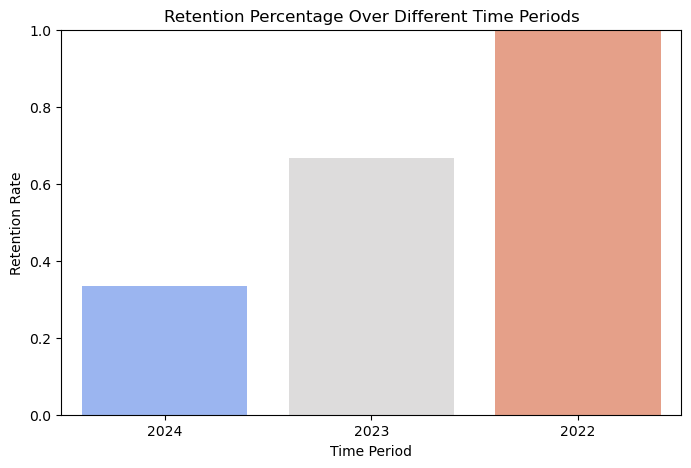

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is in a DataFrame named 'data' with a 'SignupDate' column
data['SignupDate'] = pd.to_datetime(data['SignupDate'])  # Ensure 'SignupDate' is in datetime format
data['MonthsSinceSignup'] = (pd.to_datetime('today') - data['SignupDate']).dt.days // 30  # Calculate months since signup

# Group by 'MonthsSinceSignup' and count customers
month_signups = data.groupby('MonthsSinceSignup').size().reset_index(name='CustomerCount')

# Calculate the retention rate for each timeframe
retention_rate_1_year = len(month_signups[month_signups['MonthsSinceSignup'] <= 12]) / len(month_signups)
retention_rate_2_years = len(month_signups[month_signups['MonthsSinceSignup'] <= 24]) / len(month_signups)
retention_rate_3_years = len(month_signups[month_signups['MonthsSinceSignup'] <= 36]) / len(month_signups)

# Plot retention rates for the specified time periods
timeframes = ['2024', '2023', '2022']
retention_rates = [retention_rate_1_year, retention_rate_2_years, retention_rate_3_years]

plt.figure(figsize=(8, 5))
sns.barplot(x=timeframes, y=retention_rates, hue=timeframes, palette='coolwarm', legend=False)
plt.title('Retention Percentage Over Different Time Periods')
plt.xlabel('Time Period')
plt.ylabel('Retention Rate')
plt.ylim(0, 1)  # Ensure the y-axis shows percentages
plt.show()


##### Business Insights:
 - Retention was strongest in 2022 but has steadily declined through 2024, suggesting possible issues with customer satisfaction or market changes.
 - Businesses should examine the reasons behind the high retention in 2022 and explore what led to the drop afterward. Identifying these factors is crucial for improving customer loyalty and retention, enabling businesses to reverse the trend and enhance customer satisfaction in the future.









### 5.Feature Engineering

In [48]:
today = pd.to_datetime('today')

# Calculate the difference in months
data['MonthsSinceSignup'] = (today.year - data['SignupDate'].dt.year) * 12 + today.month - data['SignupDate'].dt.month

# Display the result
data.head()

,CustomerID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,MonthsSinceSignup
0,C0199,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,25
1,C0146,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,4
2,C0127,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,9
3,C0087,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,9
4,C0070,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,34


Interpretation:
The MonthsSinceSignup column was added to quantify the time elapsed since a customer signed up, expressed in months. This helps analyze customer lifecycle, identify patterns of retention, and segment customers based on their signup duration. It provides actionable insights for targeted marketing and behavior prediction strategies.

### 6. One hot Encoding 

In [89]:
# Perform one-hot encoding on 'Region' and 'Category' columns
data = pd.get_dummies(data, columns=['Region'], drop_first=True)
data = pd.get_dummies(data, columns=['Category'], drop_first=True)

KeyError: "None of [Index(['Region'], dtype='object')] are in the [columns]"

In [91]:
data.head()

,CustomerID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,SignupDate,ProductName,MonthsSinceSignup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor
0,C0199,2024-08-25 12:38:23,0.000000,0.144104,0.590849,Andrea Jenkins,2022-12-03,ComfortLiving Bluetooth Speaker,25,True,False,False,False,True,False
1,C0146,2024-05-27 22:23:54,0.000000,0.144104,0.590849,Brittany Harvey,2024-09-04,ComfortLiving Bluetooth Speaker,4,False,False,False,False,True,False
2,C0127,2024-04-25 07:38:55,0.000000,0.144104,0.590849,Kathryn Stevens,2024-04-04,ComfortLiving Bluetooth Speaker,9,True,False,False,False,True,False
3,C0087,2024-03-26 22:55:37,0.333333,0.296350,0.590849,Travis Campbell,2024-04-11,ComfortLiving Bluetooth Speaker,9,False,False,True,False,True,False
4,C0070,2024-03-21 15:10:10,0.666667,0.448596,0.590849,Timothy Perez,2022-03-15,ComfortLiving Bluetooth Speaker,34,True,False,False,False,True,False


### 7.Scaling the Features


In [53]:
data.dtypes

CustomerID                      object
TransactionDate         datetime64[ns]
Quantity                         int64
TotalValue                     float64
Price_x                        float64
CustomerName                    object
SignupDate              datetime64[ns]
ProductName                     object
MonthsSinceSignup                int32
Region_Europe                     bool
Region_North America              bool
Region_South America              bool
Category_Clothing                 bool
Category_Electronics              bool
Category_Home Decor               bool
dtype: object

In [54]:
from sklearn.preprocessing import MinMaxScaler

# Select relevant numerical features for scaling
numerical_features = data[['Quantity', 'TotalValue', 'Price_x']]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max scaling to the numerical features
scaled_numerical_features = scaler.fit_transform(numerical_features)

# Convert scaled features back to a DataFrame for easier handling
scaled_numerical_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)

# Replace the original numerical features with the scaled ones in the dataset
data[numerical_features.columns] = scaled_numerical_df



In [55]:
data.head()

,CustomerID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,SignupDate,ProductName,MonthsSinceSignup,Region_Europe,Region_North America,Region_South America,Category_Clothing,Category_Electronics,Category_Home Decor
0,C0199,2024-08-25 12:38:23,0.000000,0.144104,0.590849,Andrea Jenkins,2022-12-03,ComfortLiving Bluetooth Speaker,25,True,False,False,False,True,False
1,C0146,2024-05-27 22:23:54,0.000000,0.144104,0.590849,Brittany Harvey,2024-09-04,ComfortLiving Bluetooth Speaker,4,False,False,False,False,True,False
2,C0127,2024-04-25 07:38:55,0.000000,0.144104,0.590849,Kathryn Stevens,2024-04-04,ComfortLiving Bluetooth Speaker,9,True,False,False,False,True,False
3,C0087,2024-03-26 22:55:37,0.333333,0.296350,0.590849,Travis Campbell,2024-04-11,ComfortLiving Bluetooth Speaker,9,False,False,True,False,True,False
4,C0070,2024-03-21 15:10:10,0.666667,0.448596,0.590849,Timothy Perez,2022-03-15,ComfortLiving Bluetooth Speaker,34,True,False,False,False,True,False
